## 1. Data wrangling and exploration
- load, clean and explore the available data
- select and prepare the features of an employee that are most relevant for solving the
following tasks

In [1118]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [1119]:
dataset = '../data/HR-Employee-Attrition.csv'
df = pd.read_csv(dataset, header=0)

In [1120]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1121]:
df.shape

(1470, 35)

In [1122]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Missing values

In [1123]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Outliers

<Axes: >

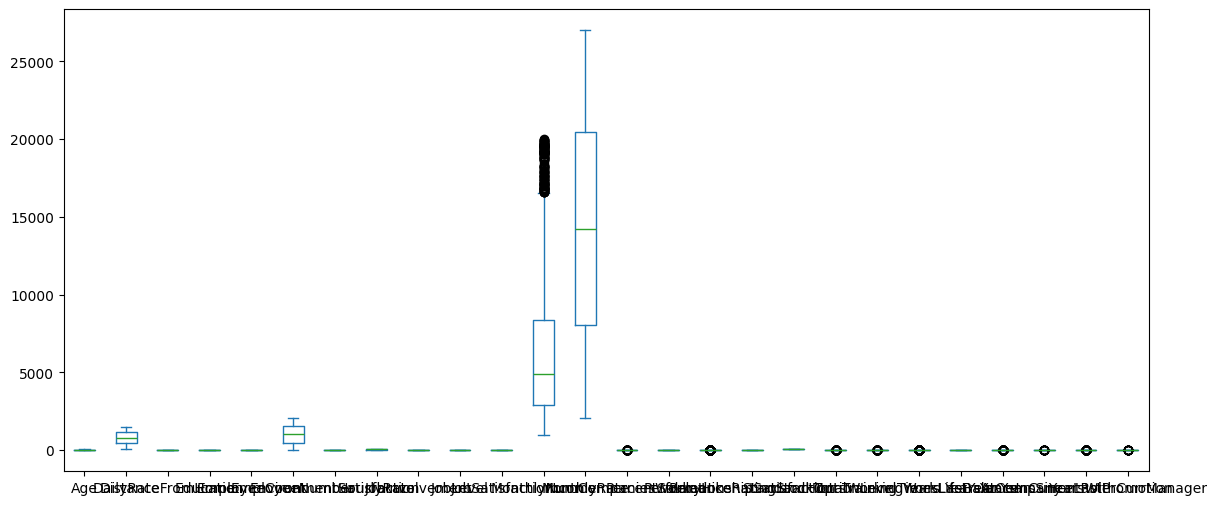

In [1124]:
df.plot(kind='box', figsize=(14,6))

C:\Users\omeru\AppData\Local\Temp\ipykernel_7832\1849066051.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,0.3))


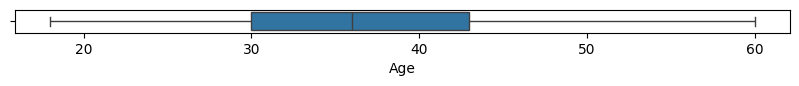

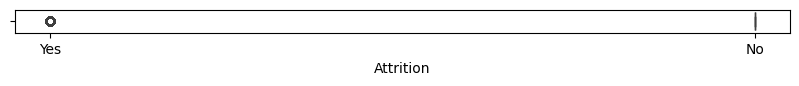

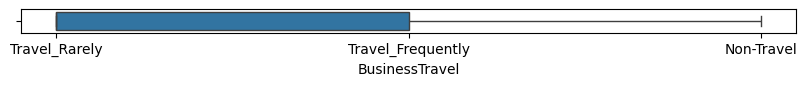

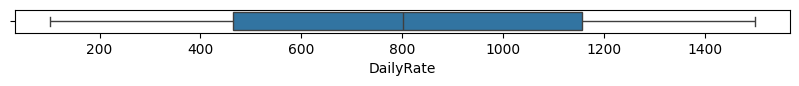

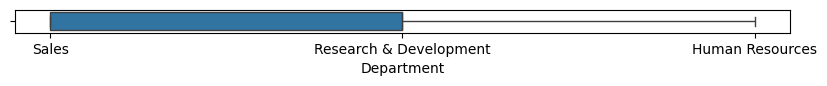

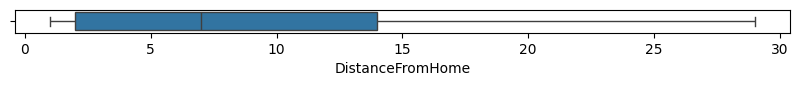

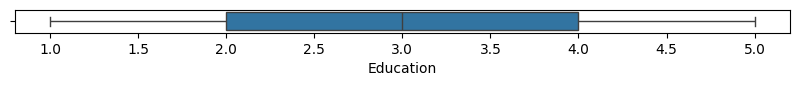

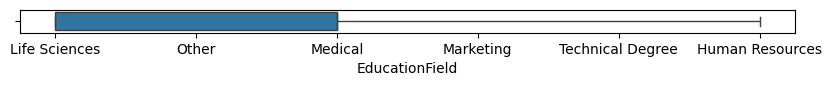

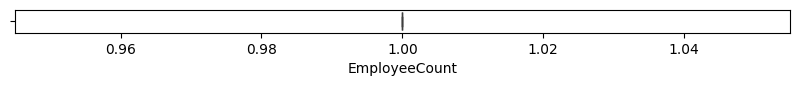

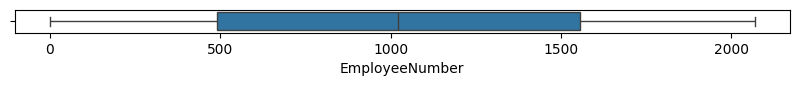

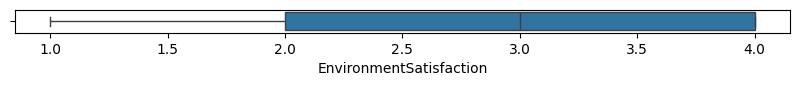

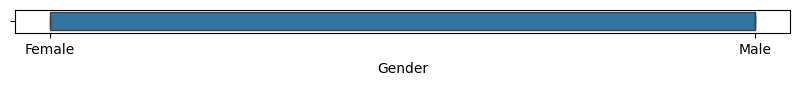

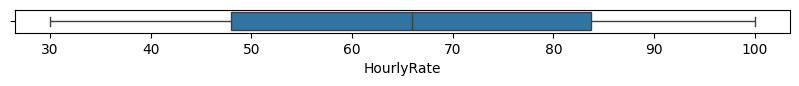

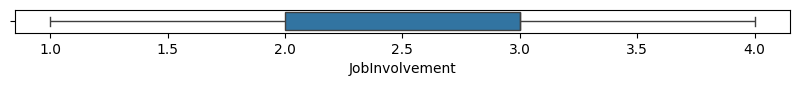

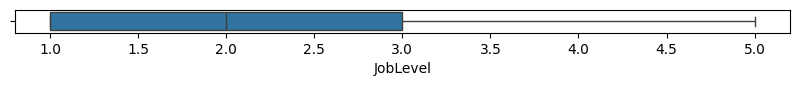

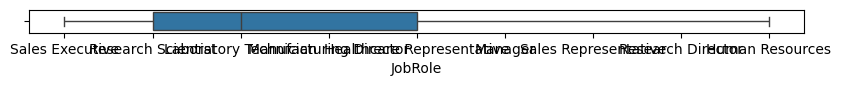

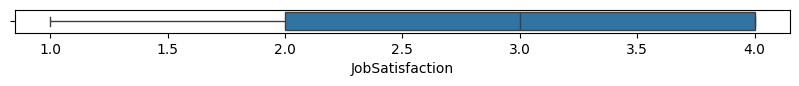

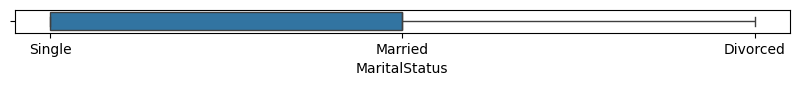

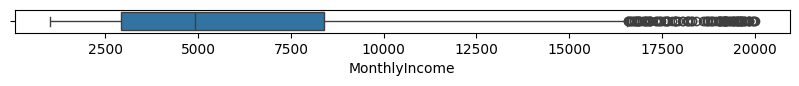

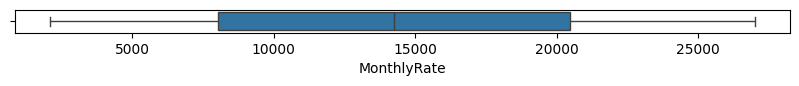

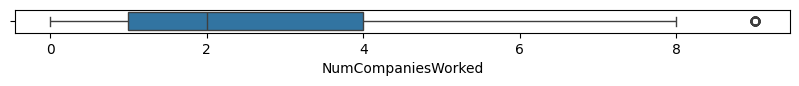

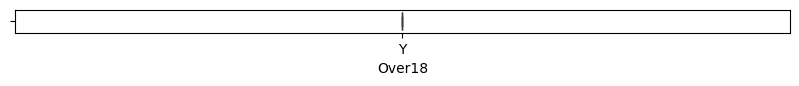

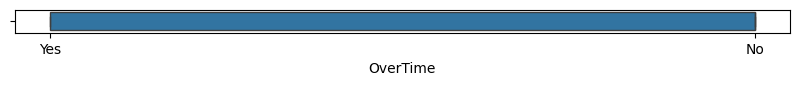

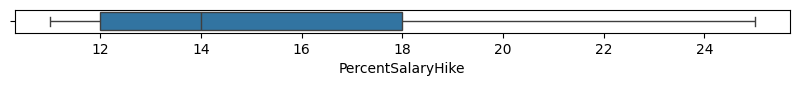

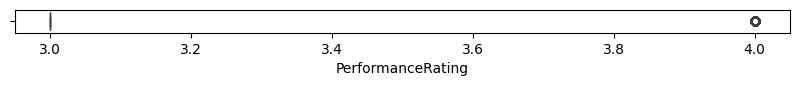

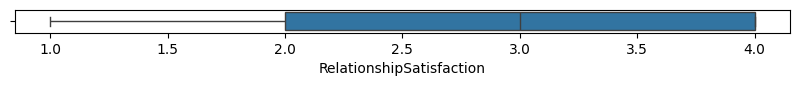

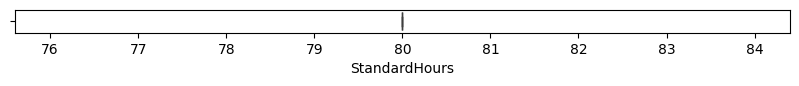

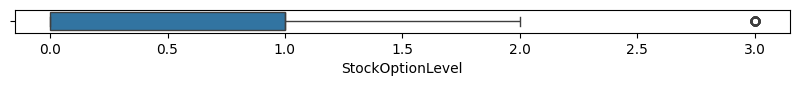

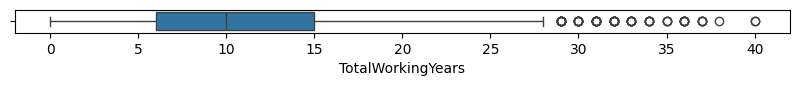

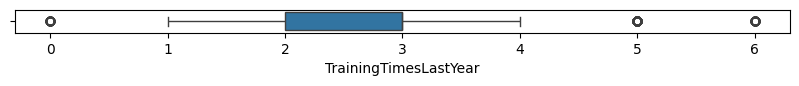

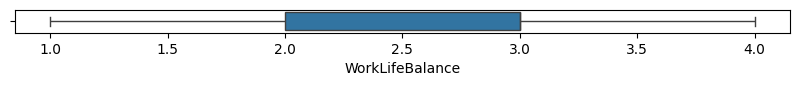

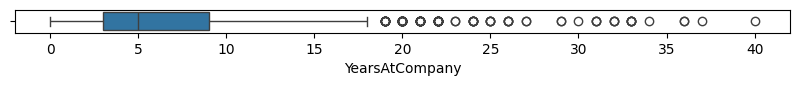

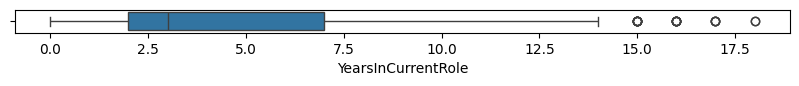

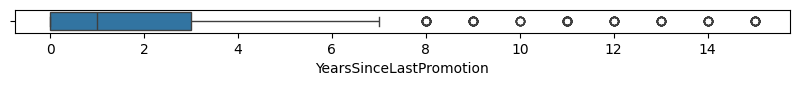

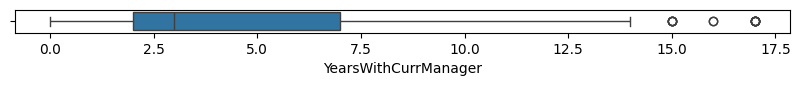

In [1125]:
for column in df:
    plt.figure(figsize=(10,0.3))
    sbn.boxplot(df[column], orient='h')

In [1126]:
print('Outliers (IQR values for numeric columns only)')
numeric_cols = df.select_dtypes(include=[np.number]).columns

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f'{column}: {IQR}')


Outliers (IQR values for numeric columns only)
Age: 13.0
DailyRate: 692.0
DistanceFromHome: 12.0
Education: 2.0
EmployeeCount: 0.0
EmployeeNumber: 1064.5
EnvironmentSatisfaction: 2.0
HourlyRate: 35.75
JobInvolvement: 1.0
JobLevel: 2.0
JobSatisfaction: 2.0
MonthlyIncome: 5468.0
MonthlyRate: 12414.5
NumCompaniesWorked: 3.0
PercentSalaryHike: 6.0
PerformanceRating: 0.0
RelationshipSatisfaction: 2.0
StandardHours: 0.0
StockOptionLevel: 1.0
TotalWorkingYears: 9.0
TrainingTimesLastYear: 1.0
WorkLifeBalance: 1.0
YearsAtCompany: 6.0
YearsInCurrentRole: 5.0
YearsSinceLastPromotion: 3.0
YearsWithCurrManager: 5.0


In [1127]:
print('Upper and lower fence (for numeric columns only)')
numeric_cols = df.select_dtypes(include=[np.number]).columns

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    print(f'{column}: Lower = {Lower_Fence}, Upper = {Upper_Fence}')


Upper and lower fence (for numeric columns only)
Age: Lower = 10.5, Upper = 62.5
DailyRate: Lower = -573.0, Upper = 2195.0
DistanceFromHome: Lower = -16.0, Upper = 32.0
Education: Lower = -1.0, Upper = 7.0
EmployeeCount: Lower = 1.0, Upper = 1.0
EmployeeNumber: Lower = -1105.5, Upper = 3152.5
EnvironmentSatisfaction: Lower = -1.0, Upper = 7.0
HourlyRate: Lower = -5.625, Upper = 137.375
JobInvolvement: Lower = 0.5, Upper = 4.5
JobLevel: Lower = -2.0, Upper = 6.0
JobSatisfaction: Lower = -1.0, Upper = 7.0
MonthlyIncome: Lower = -5291.0, Upper = 16581.0
MonthlyRate: Lower = -10574.75, Upper = 39083.25
NumCompaniesWorked: Lower = -3.5, Upper = 8.5
PercentSalaryHike: Lower = 3.0, Upper = 27.0
PerformanceRating: Lower = 3.0, Upper = 3.0
RelationshipSatisfaction: Lower = -1.0, Upper = 7.0
StandardHours: Lower = 80.0, Upper = 80.0
StockOptionLevel: Lower = -1.5, Upper = 2.5
TotalWorkingYears: Lower = -7.5, Upper = 28.5
TrainingTimesLastYear: Lower = 0.5, Upper = 4.5
WorkLifeBalance: Lower = 0.

In [1128]:
# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Start with a mask of all False (no outliers)
outlier_mask = pd.Series(False, index=df.index)

# Flag outliers across all numeric columns
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    outlier_mask |= (df[column] < Lower_Fence) | (df[column] > Upper_Fence)

# Drop all rows that had any outlier
df = df[~outlier_mask]
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (779, 35)


In [1129]:
df.shape

(779, 35)

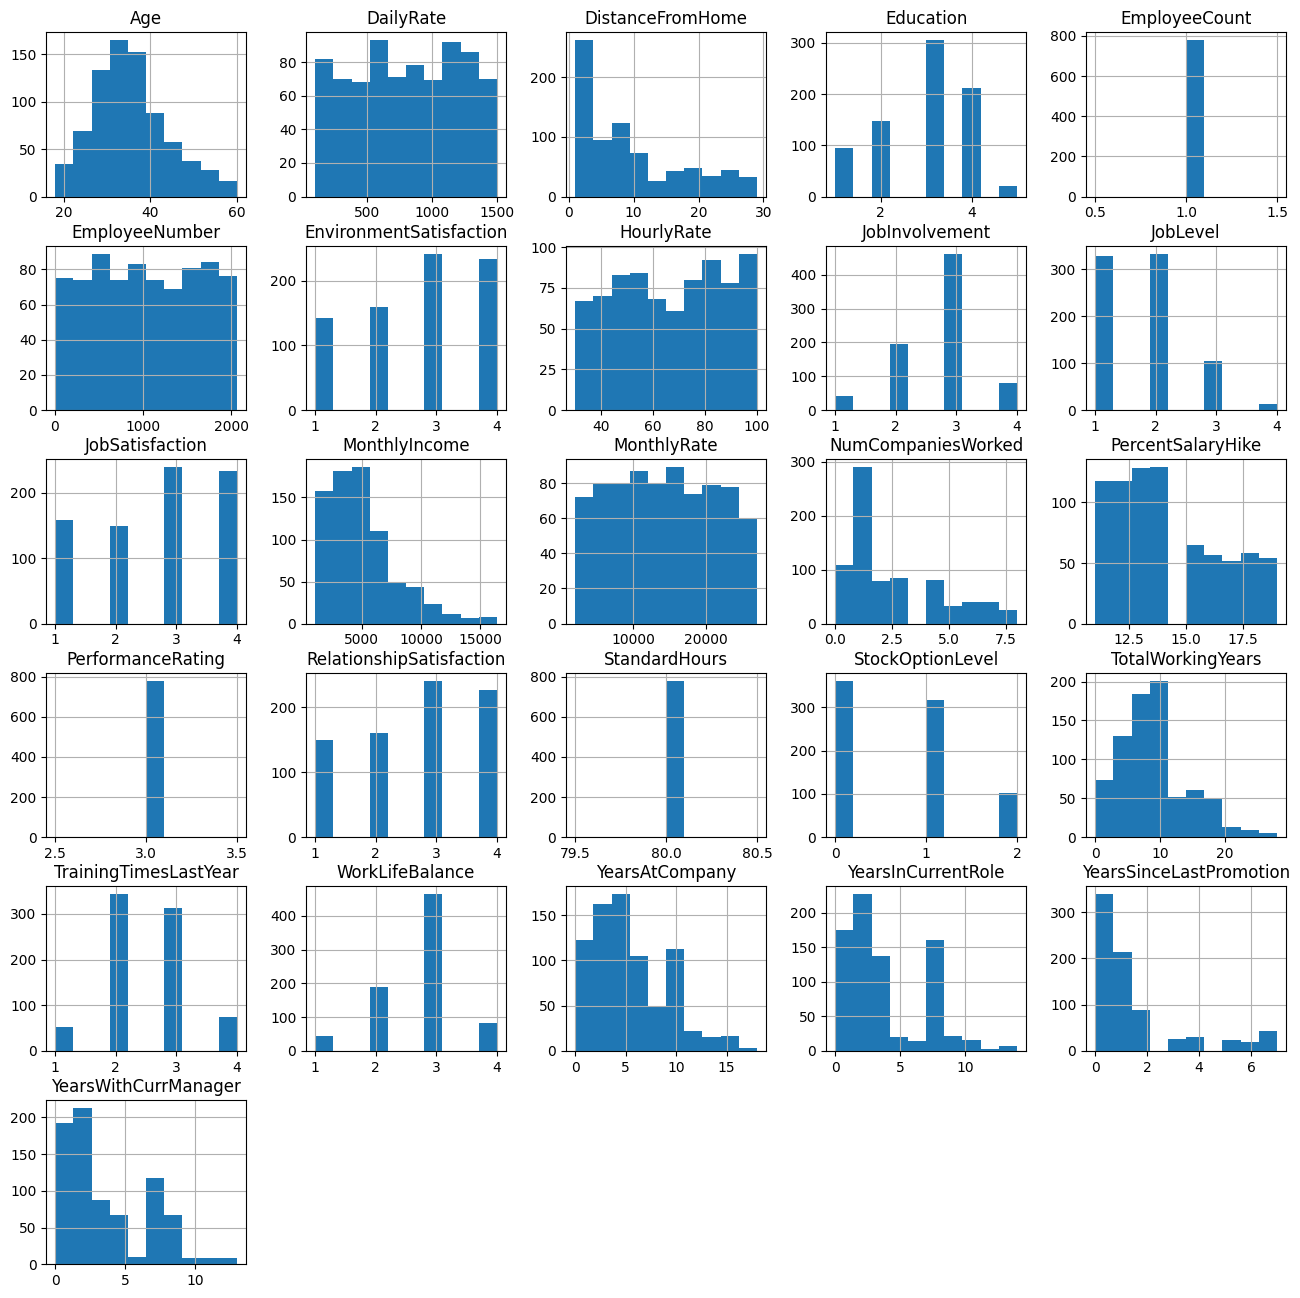

In [1130]:
data = df.hist(figsize=[16, 16])

### Data Transformation

In [1131]:
df_categorical = df.select_dtypes(exclude=[np.number])
for col in df_categorical.columns:
    print(f"{col}: {df_categorical[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Research & Development' 'Sales' 'Human Resources']
EducationField: ['Other' 'Life Sciences' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Male' 'Female']
JobRole: ['Laboratory Technician' 'Research Scientist' 'Healthcare Representative'
 'Research Director' 'Sales Executive' 'Sales Representative'
 'Manufacturing Director' 'Human Resources' 'Manager']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [1132]:
label_encoder = LabelEncoder()
for col in df_categorical.columns:
    df[col] = label_encoder.fit_transform(df[col])

C:\Users\omeru\AppData\Local\Temp\ipykernel_7832\3882176616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\omeru\AppData\Local\Temp\ipykernel_7832\3882176616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\omeru\AppData\Local\Temp\ipykernel_7832\3882176616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [1133]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,...,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,0.177150,1.617458,803.163030,1.288832,9.428755,2.890886,2.279846,1.0,1038.517330,...,2.699615,80.0,0.666239,8.956354,2.522465,2.752246,5.391528,3.563543,1.422336,3.512195
std,8.556548,0.382041,0.653252,401.254015,0.536595,8.179603,1.020185,1.373170,0.0,598.193343,...,1.086083,0.0,0.694471,5.249130,0.754044,0.716303,3.650824,3.029335,1.971536,3.047320
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.0,4.000000,...,1.000000,80.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,468.500000,1.000000,2.000000,2.000000,1.000000,1.0,507.500000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,34.000000,0.000000,2.000000,809.000000,1.000000,7.000000,3.000000,2.000000,1.0,1018.000000,...,3.000000,80.0,1.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,40.000000,0.000000,2.000000,1155.500000,2.000000,15.000000,4.000000,3.000000,1.0,1568.500000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,2.000000,28.000000,4.000000,4.000000,18.000000,14.000000,7.000000,13.000000


In [1134]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [1135]:
for column in df:
    corr = np.corrcoef(df[column], df['Attrition'])
    print(f'correlation matrix between {column} and Attrition: {corr[0]}')

correlation matrix between Age and Attrition: [ 1.         -0.17178128]
correlation matrix between Attrition and Attrition: [1. 1.]
correlation matrix between BusinessTravel and Attrition: [1.         0.00407261]
correlation matrix between DailyRate and Attrition: [ 1.        -0.0576746]
correlation matrix between Department and Attrition: [1.         0.06985475]
correlation matrix between DistanceFromHome and Attrition: [1.         0.07561342]
correlation matrix between Education and Attrition: [ 1.         -0.04597944]
correlation matrix between EducationField and Attrition: [1.        0.0352357]
correlation matrix between EmployeeCount and Attrition: [nan nan]
correlation matrix between EmployeeNumber and Attrition: [1.         0.00238813]
correlation matrix between EnvironmentSatisfaction and Attrition: [ 1.         -0.11659187]
correlation matrix between Gender and Attrition: [1.         0.01444235]
correlation matrix between HourlyRate and Attrition: [1.         0.01126527]
corre

C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\omeru\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [1136]:
selected_features = [
    'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'Age', 'JobLevel', 'YearsWithCurrManager',
    'MonthlyIncome', 'MaritalStatus', 'JobInvolvement',
    'EnvironmentSatisfaction', 'DistanceFromHome', 'JobSatisfaction',
    'JobRole', 'Department', 'BusinessTravel', 'EducationField'
]

In [1137]:
df = df[selected_features + ['Attrition']]  # include target

In [1138]:
df

,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Age,JobLevel,YearsWithCurrManager,MonthlyIncome,MaritalStatus,JobInvolvement,EnvironmentSatisfaction,DistanceFromHome,JobSatisfaction,JobRole,Department,BusinessTravel,EducationField,Attrition
2,1,0,7,0,0,37,1,0,2090,2,2,4,2,3,2,1,2,4,1
3,1,0,8,8,7,33,1,0,2909,1,3,4,3,3,6,1,1,1,0
5,0,0,8,7,7,32,1,6,3068,2,3,4,2,4,2,1,1,1,0
9,0,2,17,7,7,36,2,7,5237,1,3,3,27,3,0,1,2,3,0
11,1,0,10,9,5,29,2,8,4193,2,2,4,15,3,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0,0,10,9,4,31,2,7,9936,2,3,2,5,1,4,1,0,3,0
1464,0,0,5,4,2,26,1,0,2966,2,2,4,5,3,8,2,2,4,0
1465,0,1,17,5,2,36,2,3,2571,1,4,3,23,4,2,1,1,3,0
1468,0,0,17,9,6,49,2,8,5390,1,2,4,2,2,7,2,1,3,0


In [1139]:
df.to_csv('../data/cleaned_HR-Employee-Attrition.csv', index=False)